<img src="https://i.imgur.com/YX6UATs.png"  width="160">


## Projeto - Gerando resultados com o Seaborn

##  Considerações iniciais

Este notebook tem o objetivo de orientá-lo sobre o uso inicial da biblioteca Seaborn.

### Por que o Seaborn?

O Seaborn fornece uma interface de alto nível para o Matplotlib, uma biblioteca de visualização Python poderosa, mas às vezes pesada. Apesar o Matplotlib ser bem completo, muitas vezes, você precisa Dentre as séries de vantagens do seaborn tenta facilitar do, a biblioteca tenta facilitar:
- Usar temas padrão que são esteticamente agradáveis.
- Definir paletas de cores personalizadas.
- Fazer gráficos estatísticos atraentes.
- Exibit distribuições com facilidade e flexibilidade.
- Visualizar as informações de matrizes e DataFrames.

Esses três últimos pontos são o motivo pelo qual a Seaborn é a nossa ferramenta preferida por muitos cientistas de dados, pois torna muito fácil "conhecer" seus dados com rapidez e eficiência.

**Contudo, não se esqueca!** Seaborn é um complemento, e não um substituto, para o Matplotlib. Existem alguns ajustes que ainda exigem o Matplotlib.

### Prepare seu ambiente

Se necessário, faça a instalação da biblioteca no seu sistema usando o gerenciador de pacotes da linguagem Python:
```
$ pip install seaborn
```

Ou caso esteja usando o Anaconda:
```
$ conda install seaborn
```

### Conjunto de dados

O conjunto de dados que iremos utilizar é a base de dados de alguns pokemons.

#### Descrição do dados

No arquivo [pokemon.csv](pokemon.csv), você encontrará as seguintes colunas:
- Name: Nome em inglês do pokemon
- Type 1: Tipo primário do pokemon
- Type 2: Tipo secundário do pokemon
- Total: Total
- HP: Pontos de vida
- Attack: Pontos de ataque
- Defense: Pontos de defesa
- Sp. Atk: Pontos base do ataque especial
- Sp. Def: Pontos base da defesa especial
- Speed: Pontos de agilidade
- Stage: Estágio de evolução
- Legendary: Se o pokemon é legendário.


##  Procedimentos

###  Importando as bibliotecas
Para começarmos, vamos carregar as bibliotecas necessários no nosso ambiente.
- **%matplotlib inline**: é uma *Magic Word* do Jupyter Notebook que informa à plataforma que queremos os nosso gráficos plotados diratemente no noteobok.
- **pandas**: A biblioteca pandas fornece estruturas e ferramentas de análise de dados. Iremos utilizá-la para carregar o nosso conjunto de dados em um *dataframe*. A convenção recomanda que utilizemos a variável *pd*.
- **seaborn**: Nossa biblioteca que é a principal atração de hoje.
- **matplotlib.pyplot**: A ferramenta em que iremos treinar. Novamente, a convenção recomenda que importemos o matplotlib.pyplot no nome *plt*.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Vamos importar nosso conjunto de dados e verificar as primeiras linhas do arquivo para ver se está tudo bem. Utilizamos a método head do nosso dataframe *df*.

In [2]:
df = pd.read_csv('pokemon.csv', encoding='latin-1', index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


###  Funções de plotagem
Um dos maiores pontos fortes de Seaborn é a diversidade de funções de plotagem. Por exemplo, para criar um gráfico de dispersão é necessário apenas uma linha de código usando a função *sns.lmplot()*.

Existem duas maneiras de fazer isso.
- A primeira maneira (recomendada) é passar seu DataFrame para o argumento data =, enquanto passa nomes de colunas para os argumentos dos eixos, x = e y =.
- A segunda é passar diretamente a série de dados para os argumentos dos eixos.

Por exemplo, vamos comparar as estatísticas de Ataque e Defesa dos nossos Pokémons:

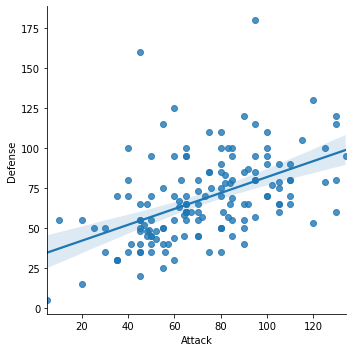

In [3]:
# Recomendado
sns.lmplot(x='Attack', y='Defense', data=df)

A propósito, Seaborn não tem uma função dedicada de plotagem de dispersão e é por isso que você vê uma linha diagonal. Na verdade, usamos a função de Seaborn para ajustar e traçar uma linha de regressão.

Felizmente, cada função de plotagem possui várias opções úteis que você pode definir.

### TAREFA 01
Usando a função *sns.lmplot()*, plote um gráfico de dispersão sem a linha de regressão e agrupe os pokemons por estágio de evolução colorindo-os (coluna 'Stage').

- **DICA 01**: Use o argumento *fit_reg* para remover a linha de regressão.
- **DICA 02**: Use o argumento *hue* e o valor 'Stage' para colorir os pontos.

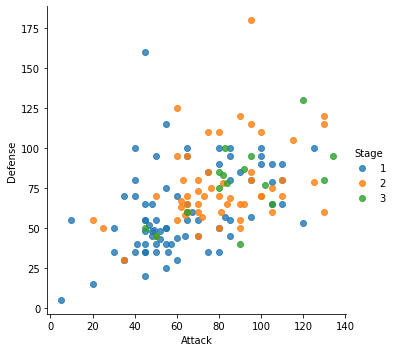

In [4]:
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')

Parece bom, mas podemos melhorar ainda mais esse gráfico de dispersão.

### Customizando com o Matplotlib
E aqui começamos a fazer uso do Matplotlib para customizar o Seaborn. Lembre-se, o Seaborn é um complemento para o Matplotlib. O Seaborn vai lhe trazer muitas facilidades, mas às vezes você precisará fazer uso do Matplotlib para alguns ajustes.

Para definir os limites dos eixos X e Y, vamos usar o Matplotlib:
- Primeiro, invoque sua função de plotagem Seaborn normalmente.
- Em seguida, invoque as funções de personalização do Matplotlib. Nesse caso, usaremos suas funções *plt.ylim()* e *plt.xlim()*.

(0.0, 200.0)

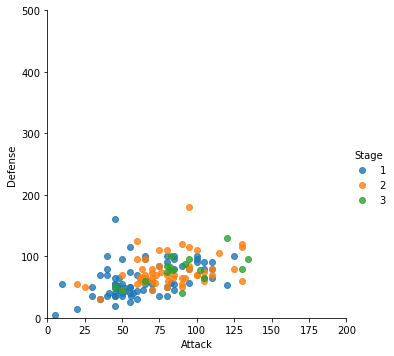

In [5]:
ax = sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')
# Ajustando com o Matplotlib
plt.ylim(0, 500)
plt.xlim(0, 200) 

### TAREFA 02
Usando o Matplotlib, mude os nomes dos eixos x e y para "Ataque" e "Defesa", respectivamente.

In [6]:
df = df.rename({'Attack': 'Ataque'}, axis = 1)
df = df.rename({'Defense':'Defesa'}, axis = 1)

(0.0, 200.0)

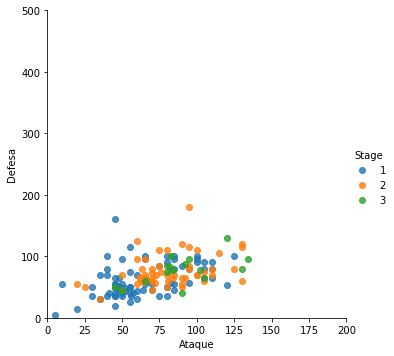

In [7]:
ax = sns.lmplot(x='Ataque', y='Defesa', data=df, fit_reg=False, hue='Stage')
plt.ylim(0, 500)
plt.xlim(0, 200) 

### Seaborn e o pandas
Mesmo que este seja um tutorial de Seaborn, o Pandas realmente também desempenha um papel muito importante. As funções de plotagem do Seaborn se beneficiam da estrutuda do dataFrame do pandas. Para plotar um gráfico de diagrama de caixas, você poderia passar o dataframe direto para dentro da função de plotagem *sns.boxplot()*. Veja:

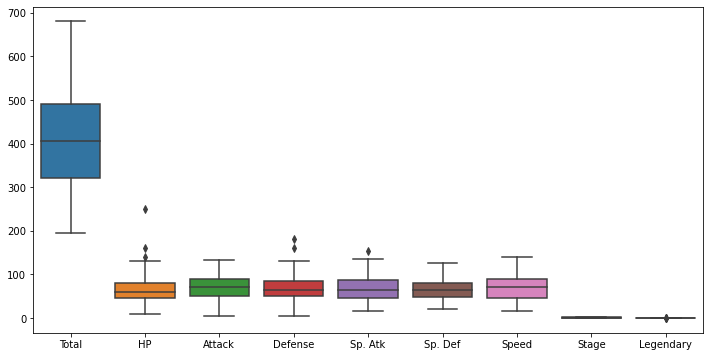

In [8]:
df = df.rename({'Ataque': 'Attack'}, axis = 1)
df = df.rename({'Defesa':'Defense'}, axis = 1)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)

Apesar de ser um gráfico razoável, alguns colunas não fazem muito sentido: 
- Podemos remover a coluna "Total", pois temos estatísticas individuais.
- Podemos remover as colunas "Stage" e "Lengedary" porque elas não são estatísticas de combate.

Como o Seaborn é amigável com Pandas, esta tarefa é muito mais fácil de ser feita no próprio dataframe.

### TAREFA 03
Remova as colunas "Total", "Stage" e "Legendary" do dataframe e repasse o resultado para a função de plotagem *sns.boxplot()*.

**Dica**: Utilize o método *drop()* do dataframe para remover as colunas indesejadas.

In [9]:
df.drop('Total',axis=1,inplace=True)
df.drop('Stage',axis=1,inplace=True)
df.drop('Legendary',axis=1,inplace=True)

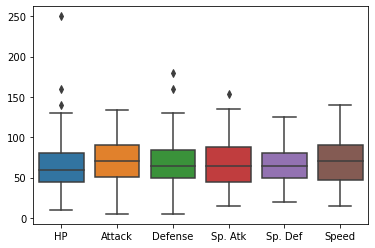

In [10]:
sns.boxplot(data=df)

### Temas do Seaborn
Outra vantagem do Seaborn é que ele vem com temas de estilo decente, prontos para uso - whitegrid, darkgrid, white, dark e ticks.

Os gráficos de violino são alternativas úteis às plotagens de caixas. Eles mostram a distribuição (através da espessura do violino) em vez de apenas as estatísticas resumidas.

Por exemplo, podemos visualizar a distribuição do Attack pelo tipo principal de Pokémon:

In [11]:
# Resultado esperado (não modifique esta célula)

Como você pode ver, os tipos de dragão (Dragon) tendem a ter estatísticas de ataque mais altas do que os tipos de fantasma (Ghost), mas também têm maior variação.

### TAREFA 04
Alterne entre os temas do Seaborn.

**DICA**: Utilize a função *sns.set_style()* para definir os temas antes de chamar a função de plotagem.

In [12]:
sns.set_style('darkgrid')


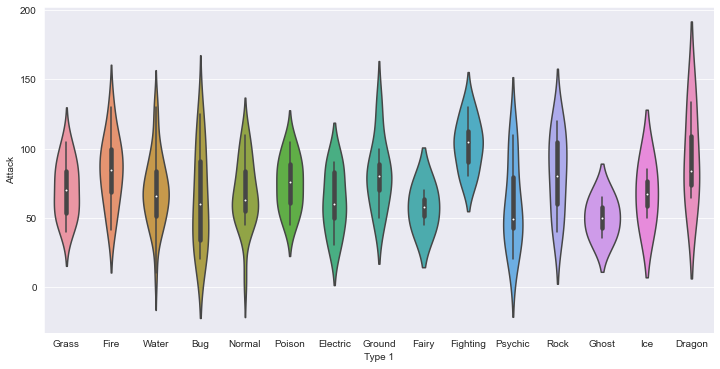

In [13]:
# Resultado esperado (não modifique esta célula)

plt.figure(figsize=(12, 6))
sns.violinplot(x='Type 1', y='Attack', data=df)

### Paleta de Cores
Felizmente, o Seaborn nos permite definir paletas de cores personalizadas. Podemos simplesmente criar uma lista Python ordenada de valores hexadecimais de cores.

Vamos usar o [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates) para nos ajudar a criar uma nova paleta de cores:

In [14]:
pokemon_cores = [
    '#78C850',  # Grass
    '#F08030',  # Fire
    '#6890F0',  # Water
    '#A8B820',  # Bug
    '#A8A878',  # Normal
    '#A040A0',  # Poison
    '#F8D030',  # Electric
    '#E0C068',  # Ground
    '#EE99AC',  # Fairy
    '#C03028',  # Fighting
    '#F85888',  # Psychic
    '#B8A038',  # Rock
    '#705898',  # Ghost
    '#98D8D8',  # Ice
    '#7038F8'  # Dragon
]

Maravilhoso. Agora podemos simplesmente usar o argumento *palette* dentro da função de plotagem *sns.violinplot()* recolorir nosso gráfico.

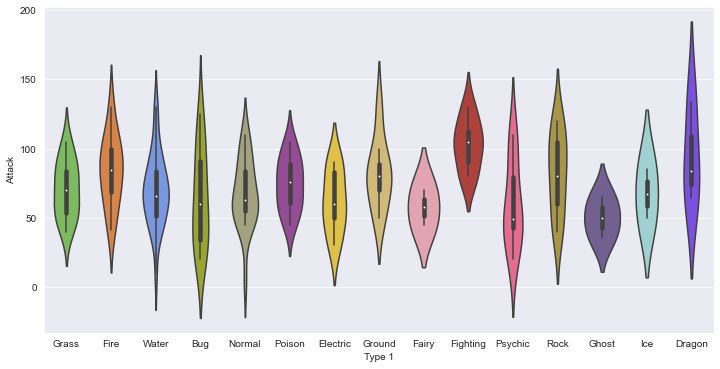

In [15]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pokemon_cores)

Muito melhor! Os gráficos de violino são ótimos para visualizar distribuições. No entanto, como temos apenas 151 Pokémon em nosso conjunto de dados, podemos simplesmente exibir cada ponto.

Vamos plotar um gráfico de enxame (swarm plot). Essa visualização mostrará cada ponto, enquanto "empilha" aqueles com valores semelhantes.

### TAREFA 05
Plote um gráfico de enxame (swarmplot) usando a paleta do cores do exemplo anterior - pokemon_cores.

**DICA**: Utilize a função de plotagem *sns.swarmplot()*

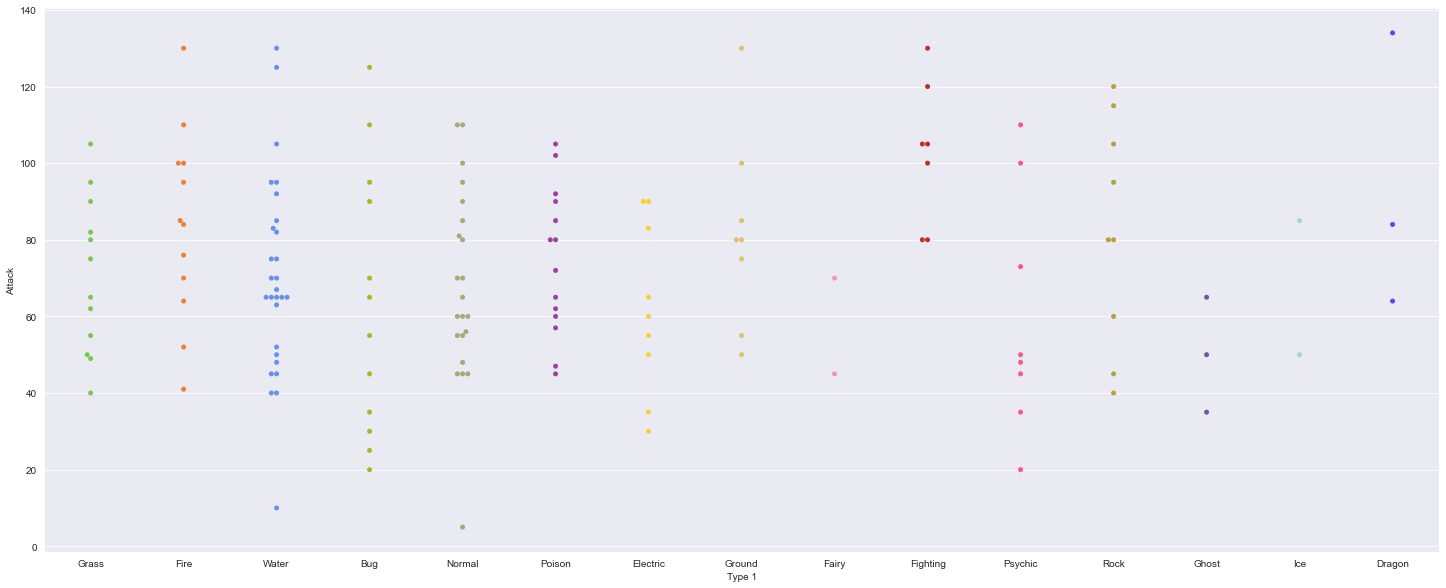

In [16]:
plt.figure(figsize=(25, 10))
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pokemon_cores)

Isso é útil, mas não podemos combinar nosso gráfico de enxame e de violino? Afinal, eles exibem informações semelhantes, certo?

### Sobreposição de gráficos
A resposta é sim. É bastante simples sobrepor plotagens usando Seaborn e funciona da mesma maneira que com Matplotlib. Aqui está o que faremos:
- Primeiro, aumentaremos nossa figura usando o Matplotlib.
- Então, desenharemos o gráfico de violino. No entanto, definiremos inner = None para remover as barras dentro dos violinos.
- Depois, desenharemos o gráfico de enxame. Desta vez, deixaremos os pontos pretos para que eles apareçam mais.
- Por fim, definiremos um título usando o Matplotlib.

Parece muita coisa? Então veja como é simples:

Text(0.5, 1.0, 'Ataque por tipo de Pokemon')

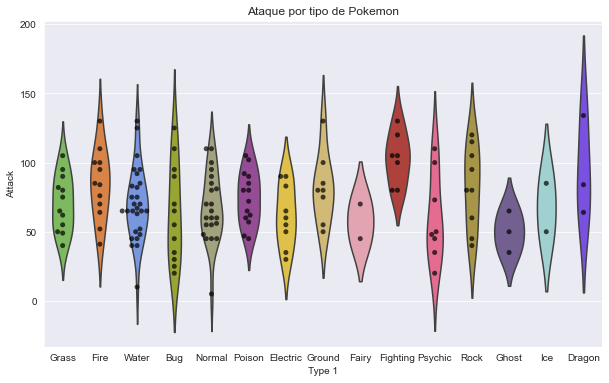

In [17]:
plt.figure(figsize=(10,6))
 
# Crie o gráfico de violino.
sns.violinplot(x='Type 1', y='Attack', data=df, inner=None, palette=pokemon_cores)

# Crie o gráfico de enxame.
sns.swarmplot(x='Type 1', y='Attack', data=df, color='k', alpha=0.7)
 
# Define o título usando o Matplotlib
plt.title('Ataque por tipo de Pokemon')

Incrível, agora temos um gráfico bonito que mostra como os valores de ataque são distribuídos entre os diferentes tipos de Pokémon.

### Outras visualizações
Concluiremos as tarefas com algumas visualizações rápidas, mas que podem ser bastante úteis.

### TAREFA 06
Os mapas de calor (em inglês, _heatmap_) ajudam a visualizar dados do tipo matriz. Crie um heatmap de correlação do dataframe `df`.

- **Dica 01**: Antes de plot, crie a matriz de correlação do dataframe através do método `corr()`.
- **Dica 02**: Utilize a função de plotagem `sns.heatmap()`.

In [18]:
df.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


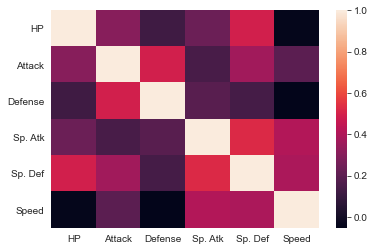

In [19]:
sns.heatmap(df.corr())

### TAREFA 07
Os histogramas permitem plotar as distribuições de variáveis numéricas. Plote um histograma usando as informações de ataque (Atack) dos pokemons.

**Dica**: Utilize a função de plotagem *sns.distplot()*.

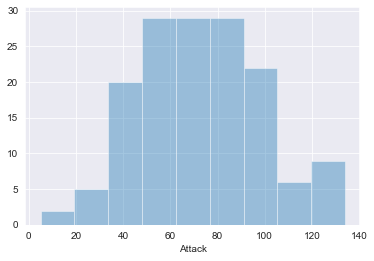

In [20]:
sns.distplot(df['Attack'], kde=False)

### TAREFA 08
Os gráficos de barra ajudam a visualizar as distribuições de variáveis categóricas. Plote um gráfico de barra usando a variável "Type 1".

- **Dica 01**: Utilize a função de plotagem *sns.countplot()*.
- **Dica 02**: Caso a plotagem fique desajustada, aumente o tamanho usando o Matplotlib.

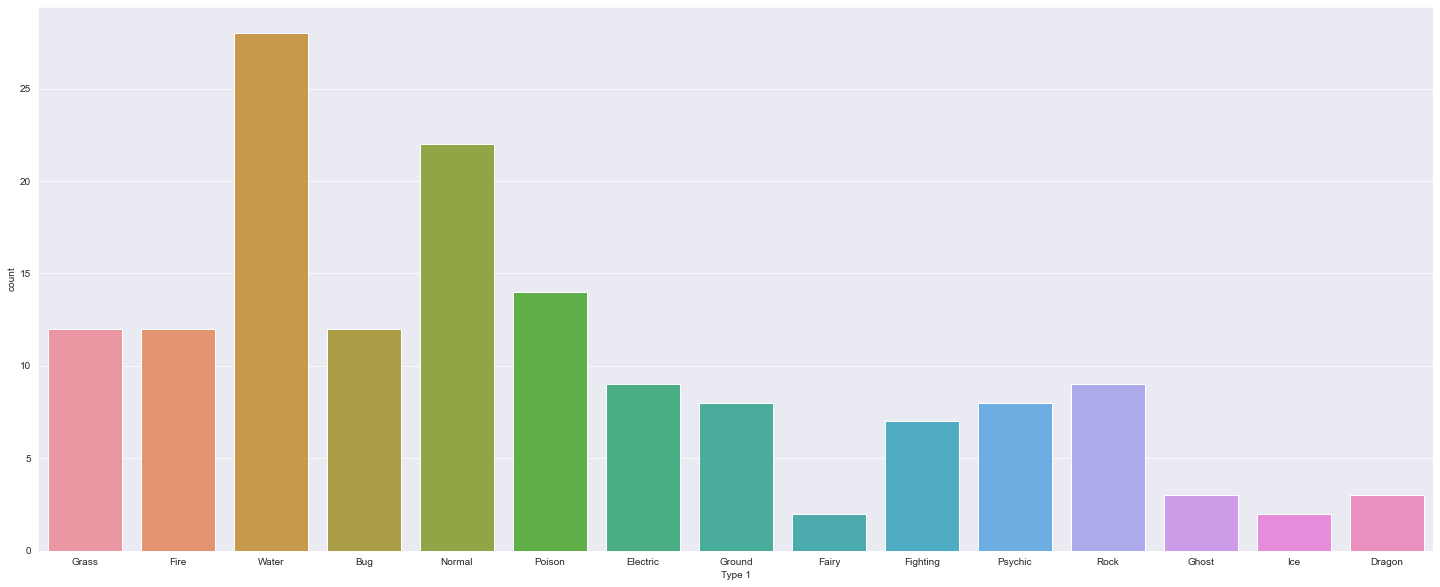

In [21]:
plt.figure(figsize=(25, 10))
sns.countplot(df['Type 1'])

## Conclusão

A biblioteca do Seaborn é extensa. Os conceitos iniciais apresentados aqui permitem que você explore o que de melhor o Seaborn tem.

### Awari -  <a href="https://awari.com.br/"> awari.com.br</a>